<a href="https://colab.research.google.com/github/mostafa-sadeghi/amirali_eslami/blob/main/vgg16OnFashionDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!unzip "/content/drive/MyDrive/Fashion/archive.zip" -d "/content/drive/MyDrive/Fashion"

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
fashion_train_df = pd.read_csv('/content/drive/MyDrive/Fashion/fashion-mnist_train.csv', sep=",")
fashion_test_df = pd.read_csv('/content/drive/MyDrive/Fashion/fashion-mnist_test.csv', sep=",")

print(fashion_train_df.shape, fashion_test_df.shape)


training = np.array(fashion_train_df, dtype="float32")
testing = np.array(fashion_test_df, dtype="float32")


(60000, 785) (10000, 785)


In [4]:
X_train = training[:,1:]/255
len(X_train)

60000

In [5]:
y_train = training[:,0]
y_train
len(y_train)

60000

In [11]:
X_test = testing[:,1:]/255
y_test = testing[:,0]
len(y_test)

10000

In [12]:
train_X=np.dstack([X_train] * 3)
test_X=np.dstack([X_test]*3)
train_X.shape,test_X.shape

((60000, 784, 3), (10000, 784, 3))

In [13]:
train_X = train_X.reshape(-1, 28,28,3)
test_X= test_X.reshape (-1,28,28,3)
train_X.shape,test_X.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [14]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

In [15]:
from keras.applications.vgg16 import preprocess_input
from skimage.transform import resize
def read_image_url(image, img_size=(224,224)):
  
  image = resize(image,img_size)
  image = image.reshape(( image.shape[0], image.shape[1], image.shape[2]))
  image = preprocess_input(image)

  return image


In [16]:
train_X = np.asarray([read_image_url(image, img_size=(224,224)) for image in train_X[0:1000]])
test_X = np.asarray([read_image_url(image, img_size=(224,224)) for image in test_X[0:1000]])

train_X.shape, test_X.shape

((1000, 224, 224, 3), (1000, 224, 224, 3))

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(train_X , y_train[0:1000], test_size=0.2, random_state=12345)

print(len(X_train))
len(X_validate)
print(X_train.shape)
X_validate.shape

800
(800, 224, 224, 3)


(200, 224, 224, 3)

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.optimizers import Adam
import tensorflow as tf

In [19]:
cnn_model = Sequential()
cnn_model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
cnn_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
cnn_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
cnn_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
cnn_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


cnn_model.add(Conv2D(32,3,3, input_shape=(28,28,1), activation="relu"))
cnn_model.add(MaxPool2D((2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32,activation="relu"))
cnn_model.add(Dense(10,activation="sigmoid"))

cnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [21]:
history = cnn_model.fit(X_train, y_train[0:1000], epochs=10, 
                    validation_data=(X_validate, y_validate))

Epoch 1/10


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


25/25 [==============================] - 34s 463ms/step - loss: 3.7931 - accuracy: 0.1112 - val_loss: 2.3019 - val_accuracy: 0.1250
Epoch 2/10
25/25 [==============================] - 10s 406ms/step - loss: 2.3026 - accuracy: 0.1025 - val_loss: 2.3018 - val_accuracy: 0.1550
Epoch 3/10
25/25 [==============================] - 10s 385ms/step - loss: 2.3022 - accuracy: 0.1050 - val_loss: 2.3015 - val_accuracy: 0.1000
Epoch 4/10
25/25 [==============================] - 10s 413ms/step - loss: 2.3018 - accuracy: 0.1100 - val_loss: 2.3011 - val_accuracy: 0.1000
Epoch 5/10
25/25 [==============================] - 10s 413ms/step - loss: 2.3014 - accuracy: 0.1100 - val_loss: 2.3009 - val_accuracy: 0.1000
Epoch 6/10
25/25 [==============================] - 10s 395ms/step - loss: 2.3012 - accuracy: 0.1100 - val_loss: 2.3007 - val_accuracy: 0.1000
Epoch 7/10
25/25 [==============================] - 10s 398ms/step - loss: 2.3009 - accuracy: 0.1100 - val_loss: 2.3002 - val_accuracy: 0.1000
Epoch 8/10

In [24]:
evaluation = cnn_model.evaluate(test_X,y_test[0:1000])
print(f"Test accuracy: {evaluation[1]*100:.2f}%")

32/32 [==============================] - 4s 116ms/step - loss: 2.3025 - accuracy: 0.0980
Test accuracy: 9.80%


In [26]:
predicted_classes = cnn_model.predict(test_X)
len(predicted_classes)

32/32 [==============================] - 4s 109ms/step


1000

In [27]:
print(predicted_classes[0])
y_test[0]

[0.5132145  0.48890418 0.50747705 0.5110215  0.5049394  0.48257282
 0.5096051  0.49807695 0.50243384 0.49275988]


0.0

In [28]:
np.argmax(predicted_classes[0])

0

In [29]:
y_test[0]

0.0

(25,)


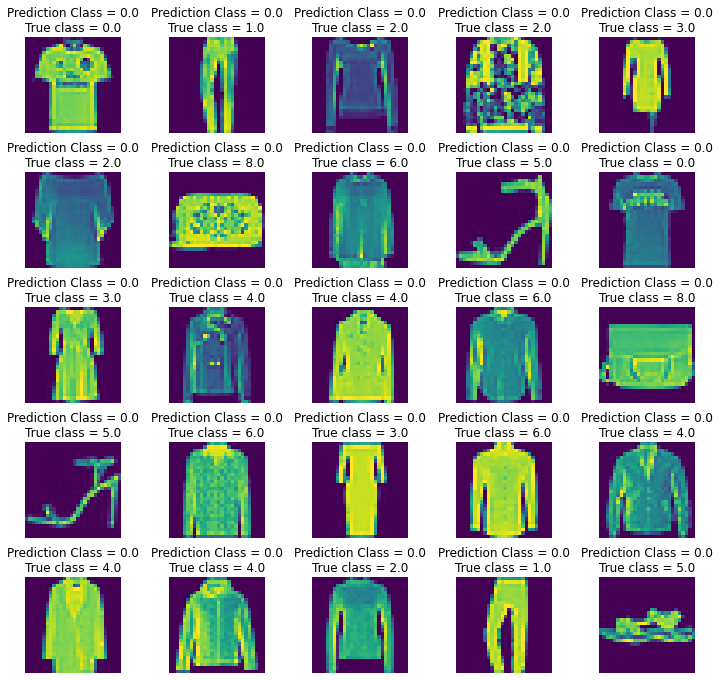

In [30]:
fig, axes = plt.subplots(5,5,figsize=(12,12))
axes = axes.ravel()
print(axes.shape)
X_test[0].shape
for i in np.arange(0,25):
  axes[i].imshow(X_test[i].reshape(28,28))
  axes[i].set_title(f"Prediction Class = {np.argmax(predicted_classes[i]):.1f}\nTrue class = {y_test[i]}")


  axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)